# Dejunkifying a Plot
In this lecture, I want to walk you through the process of taking a regular Matplotlib plot and applying Tufte's principles of data-ink ratio and chartjunk to make it just a little bit better. I'm going to walk through all of the steps using the Jupyter notebooks and you're welcome to follow along.

But if you want a bit more of a challenge, I'll be including in video quizzes along the way which prompts you to solve the problem before I address.

Let's get started -- We will use a plot of data on the popularity of programming languages from Stack Overflow for the year 2016.

See the data here: [http://stackoverflow.com/research/developer-survey-2016#most-popular-technologies-per-occupation](http://stackoverflow.com/research/developer-survey-2016#most-popular-technologies-per-occupation)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Here there are five different languages,
# Python, SQL, Java, C++, and JavaScript.
# We'll find their positions as a rank
# using NumPy as a range function.
# And here are the popularity
# values from Stack Overflow.
languages = ['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# We'll create a bar chart based on rank and
# popularity, then add x and y ticks and
# set a title.
plt.figure(figsize=(10, 8));
plt.bar(pos, popularity, align='center');
plt.xticks(pos, languages);
plt.ylabel('% Popularity');
plt.title('Top 5 Languages for Math & Data \nby % Popularity on Stack Overflow');

Okay, here's the first challenge -- our plot has this frame around it, but it's not really necessary and it seems a little heavyweight.

Let's remove that ink. This is a bit more involved, but we can get the current axis, then iterate through all the spine, setting their visibility to false.

Already that will make the chart look much more lightweight.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

languages = ['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.figure(figsize=(10, 8));
plt.bar(pos, popularity, align='center');
plt.xticks(pos, languages);
plt.ylabel('% Popularity');
plt.title('Top 5 Languages for Math & Data \nby % Popularity on Stack Overflow');

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

Now, the blue is okay, but it doesn't really help us differentiate between the bars at all. How about we soften all of the hard blacks to gray, then we change the bar colors to gray as well?

Also, let's keep the Python bar the same color of blue that it was originally to make it stand out.

In [ ]:
plt.figure(figsize=(10, 8));
languages = ['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# There are several different ways that we could do this.
# The way I chose was to add an alpha parameter to everything,
# which adds a bit of transparency and softens the colors up a bit.
# I also set the bars themselves to a neutral gray color then chose
# a nice blue from the Python website to accentuate the first bar.

# change the bar color to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# change one bar, the python bar, to a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)
# set the title
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

Now let's fix the y axis by removing the labels and just directly labeling the individual bars.

We don't really need the y axis label, since the title tells us everything we need to know about the units in this chart.

In [ ]:
plt.figure(figsize=(10, 8));
languages = ['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
bars[0].set_color('#1F77B4')

plt.xticks(pos, languages, alpha=0.8)

# We can remove the y label by just setting it to an empty list
plt.yticks([])

plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Removing the label is easy, but changing
# the bars is a little bit of a pain.
# For this we want to iterate over each
# of the bars and grab its height.
# Then we want to create a new text
# object with the data information.
for bar in bars:
    # Unfortunately, this means doing
    # a little bit of playing with padding.
    # Here I'll set up the x location to the bar
    # x plus the width divided by two and
    # the y location to be
    # the bar height minus five.

    # It might seem weird to get the middle
    # of the bar in the x dimension, but
    # that's because I'm setting the label
    # to center itself, horizontally.

    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, str(int(height)) + '%',
                   ha='center', color='w', fontsize=11)

And that's all there is to it. A simple series of steps to make your bar charts a little bit more usable.

When you were watching this video, did you find a different way to do things? Perhaps other elements from Tufte or Cairo that you think could be used to make this more readable?

Feel free to go into the discussion forums and share them with me and your classmates.

___

# Practice Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Top 5 Languages for Data Science \nby % Popularity on Stack Oveflow')

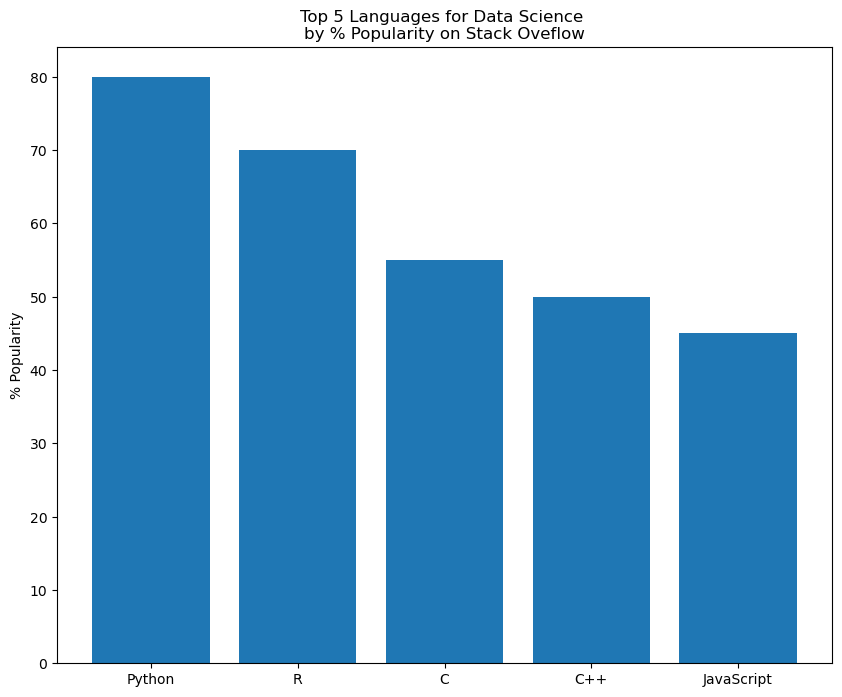

In [4]:
languages = ['Python','R','C','C++','JavaScript']
pos = np.arange(len(languages))
popularity = [80,70,55,50,45]

plt.figure(figsize=(10,8))
plt.bar(pos, popularity, align="center")
plt.xticks(pos,languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Data Science \nby % Popularity on Stack Oveflow')

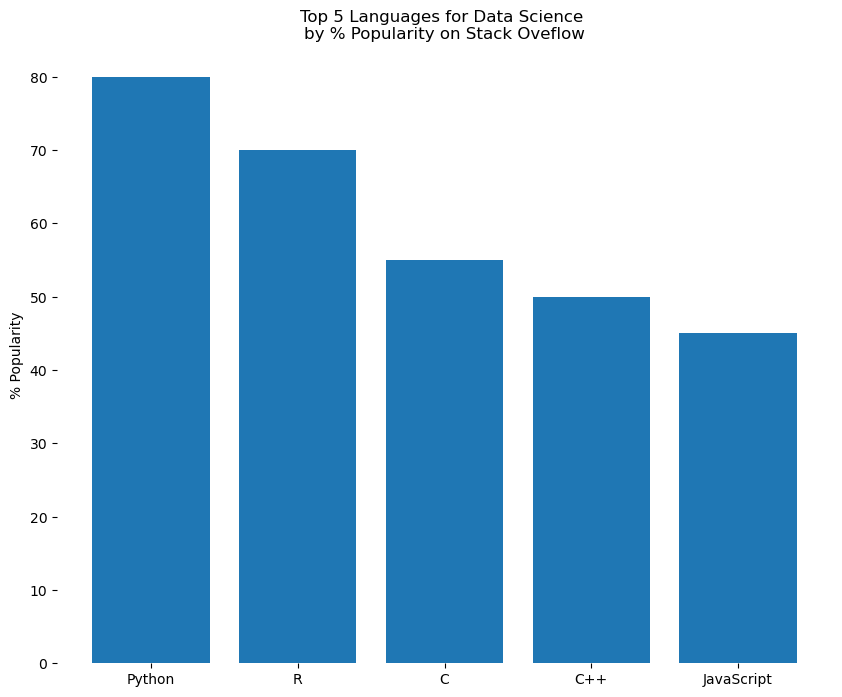

In [5]:
languages = ['Python','R','C','C++','JavaScript']
pos = np.arange(len(languages))
popularity = [80,70,55,50,45]

plt.figure(figsize=(10,8))
plt.bar(pos, popularity, align="center")
plt.xticks(pos,languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Data Science \nby % Popularity on Stack Oveflow')

for spine in plt.gca().spines.values():
    spine.set_visible(False)

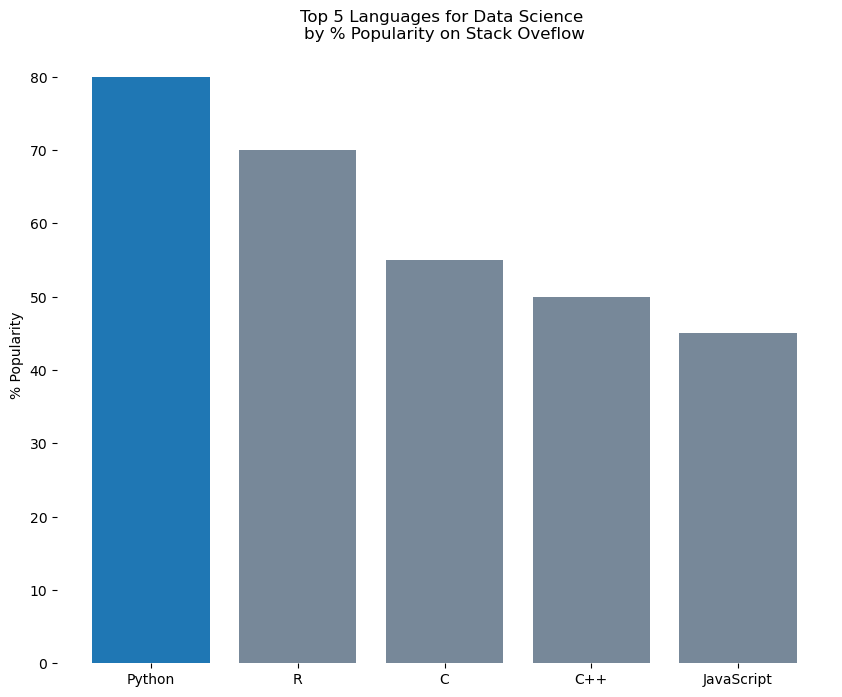

In [6]:
languages = ['Python','R','C','C++','JavaScript']
pos = np.arange(len(languages))
popularity = [80,70,55,50,45]

plt.figure(figsize=(10,8))
bars = plt.bar(pos, popularity, align="center", linewidth=0, color='lightslategrey')
bars[0].set_color('#1F77B4')

plt.xticks(pos,languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Data Science \nby % Popularity on Stack Oveflow')

for spine in plt.gca().spines.values():
    spine.set_visible(False)

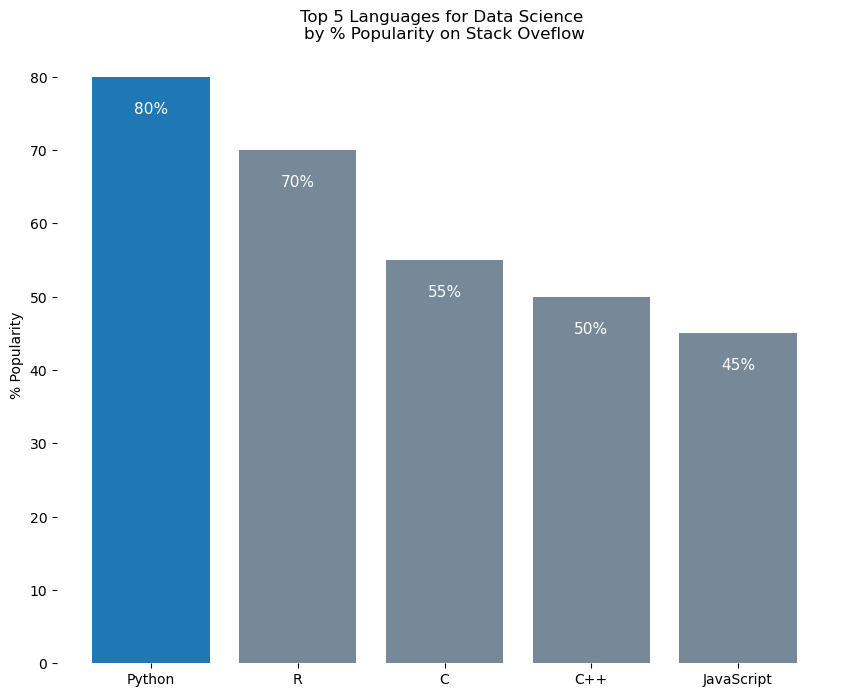

In [13]:
languages = ['Python','R','C','C++','JavaScript']
pos = np.arange(len(languages))
popularity = [80,70,55,50,45]

plt.figure(figsize=(10,8))
bars = plt.bar(pos, popularity, align="center", linewidth=0, color='lightslategrey')
bars[0].set_color('#1F77B4')

plt.xticks(pos,languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Data Science \nby % Popularity on Stack Oveflow')

for spine in plt.gca().spines.values():
    spine.set_visible(False)
    

# for bar in bars:
#     height = bar.get_height()
#     plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() -5, str(int(height)) + '%',
#                   ha='center', color='w', fontsize=11)
    
for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, str(int(height)) + '%',
                   ha='center', color='w', fontsize=11)